# Python + Google Sheets

Authorize client and open the spreadsheet.

In [1]:
import pygsheets

gc = pygsheets.authorize(service_file='./client_secrets.json')

sh = gc.open("Copy of Legislators 2017")

service_email : sheets@dummy-project-1210.iam.gserviceaccount.com


List the worksheets in the spreadsheet.

In [2]:
sh.worksheets()

[<Worksheet 'legislators-current' index:0>]

Read the main data table into a Pandas DataFrame.

In [3]:
import pandas as pd

wks = sh.worksheet_by_title('legislators-current')

df = pd.DataFrame(
    wks.
    get_all_records()
)

Run an analysis

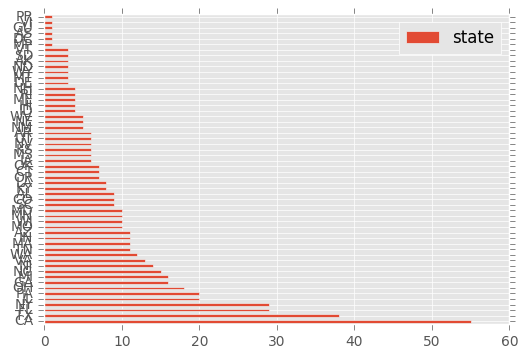

In [4]:
# count representatives per state
state_counts = df.state.value_counts().to_frame()

# make plots visible in notebook
% matplotlib inline

# use ggplot style
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# plot counts
state_counts.plot.barh()

Export analysis output to spreadsheet.

In [5]:
reps_per_state_wks = sh.add_worksheet('reps_per_state')

In [6]:
reps_per_state_wks.set_dataframe(state_counts.reset_index(),(1,1), fit=True)

Share analysis output.

In [7]:
sh.share("hello@vndrewlee.com")